In [1]:
from scipy import misc
from PIL import Image
from skimage import exposure
from sklearn import svm

import scipy
from math import sqrt,pi
from numpy import exp
from matplotlib import pyplot as plt
import numpy as np
import glob
import matplotlib.pyplot as pltss
import cv2 as cv
from matplotlib import cm
import pandas as pd
from math import pi, sqrt
import pywt
import os   

image couleur de rétine


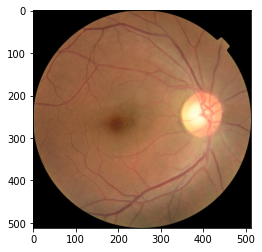

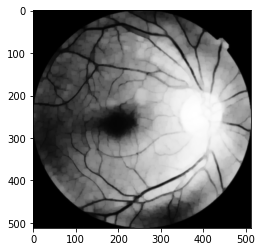

avant élimination du réseau vasculaire


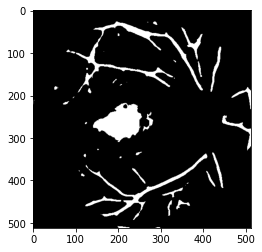

Après élimination du réseau vasculaire


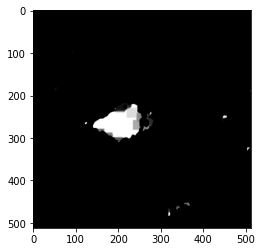

résultat finale


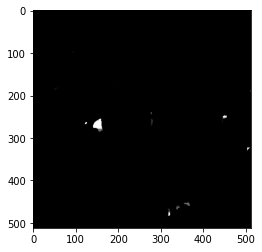

In [5]:
    # appliquer l'algorithme sur une seulle image

    image = cv.imread('/home/chakour/Bureau/Code Mehdi/reseau_vasculaire/12484_right.jpeg')
    image=  cv.cvtColor(image, cv.COLOR_BGR2RGB)
    print("image couleur de rétine")
    plt.imshow(image)
    plt.show()
    img_reseau = '/home/chakour/Bureau/Code Mehdi/reseau vasculaire.jpeg'
    img_macula = '/home/chakour/Bureau/Code Mehdi/macula.jpeg'
    ###################### Prétraitement
    #augmentation de contrast
    blue, green, red = cv.split(image)
    #cv.imshow('green', green)
    equalized=cv.equalizeHist(green)
    #cv.imshow('eq',equalized)
    #filtre de gauss
    gblur = cv.GaussianBlur(equalized, (5, 5), 0)
    kernel = np.ones((3,3),np.uint8)
    opening = cv.morphologyEx(gblur,cv.MORPH_OPEN,kernel, iterations = 3)
    opening=  cv.cvtColor(opening, cv.COLOR_BGR2RGB)
    plt.imshow(opening)
    plt.show()

    ###########################  Détection des lésions sombres (rouges)
    median1 = cv.medianBlur(opening,111)
    median2 = cv.medianBlur(opening,7)
    result_sub = cv.subtract(median1,median2)
    _, thresh = cv.threshold(result_sub, 25, 255, cv.THRESH_BINARY)
    print("avant élimination du réseau vasculaire")
    plt.imshow(thresh)
    plt.show()
    #image = cv.resize(thresh, (1152,1500))
    #plt.imshow(thresh)
    #plt.show()
    #print(thresh.size)


    ################  segmentation et élimination de l’arbre vasculaire
    kernel = np.ones((3,3),np.uint8)
    res = cv.imread(img_reseau)
    res2 = cv.dilate(res,kernel,iterations=10)
    result = cv.subtract(thresh,res2)
    print("Après élimination du réseau vasculaire")
    plt.imshow(result)
    plt.show()

    ##################      Segmentation et élimination de la macula
    kernel = np.ones((3,3),np.uint8)
    mac = cv.imread(img_macula)
    mac2 = cv.dilate(mac,kernel,iterations=10)
    resultmac = cv.subtract(result,mac2)
    print("résultat finale")
    plt.imshow(resultmac)
    plt.show()

image couleur de rétine


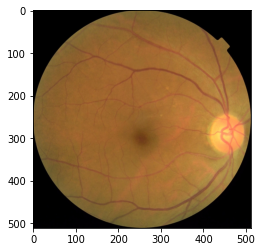

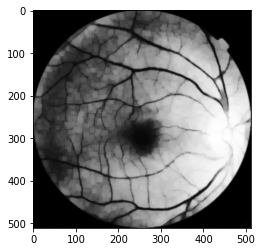

avant élimination du réseau vasculaire


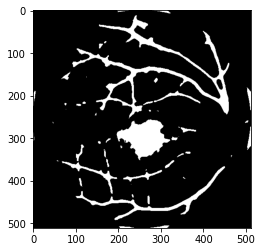

error: OpenCV(4.2.0) ../modules/core/src/arithm.cpp:666: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [20]:
 # joindre le dossier des images
images_path='/home/chakour/Bureau/Code Mehdi/reseau_vasculaire'
for images_name in os.listdir(images_path):
        img_pt = os.path.join(images_path,images_name)
        image = cv.imread(img_pt) 
    
        image=  cv.cvtColor(image, cv.COLOR_BGR2RGB)
        print("image couleur de rétine")
        plt.imshow(image)
        plt.show()
        img_reseau = '/home/chakour/Bureau/Codes stagaires/reseau vasculaire.jpeg'
        img_macula = '/home/chakour/Bureau/Codes stagaires/macula.jpeg'
        ###################### Prétraitement
        #augmentation de contrast
        blue, green, red = cv.split(image)
        #cv.imshow('green', green)
        equalized=cv.equalizeHist(green)
        #cv.imshow('eq',equalized)
        #filtre de gauss
        gblur = cv.GaussianBlur(equalized, (5, 5), 0)
        kernel = np.ones((3,3),np.uint8)
        opening = cv.morphologyEx(gblur,cv.MORPH_OPEN,kernel, iterations = 3)
        opening=  cv.cvtColor(opening, cv.COLOR_BGR2RGB)
        plt.imshow(opening)
        plt.show()

        ###########################  Détection des lésions sombres (rouges)
        median1 = cv.medianBlur(opening,111)
        median2 = cv.medianBlur(opening,7)
        result_sub = cv.subtract(median1,median2)
        _, thresh = cv.threshold(result_sub, 25, 255, cv.THRESH_BINARY)        

        width = int(image.shape[1])
        height = int(image.shape[0])

        # dsize
        dsize = (width, height)
        thresh1 = cv.resize(thresh,dsize)
        print("avant élimination du réseau vasculaire")
        plt.imshow(thresh1)
        plt.show()
        #image = cv.resize(thresh, (1152,1500))
        #plt.imshow(thresh)
        #plt.show()
        #print(thresh.size)


        ################  segmentation et élimination de l’arbre vasculaire
        kernel = np.ones((3,3),np.uint8)
        res = cv.imread(img_reseau)
        res2 = cv.dilate(res,kernel,iterations=10)
        result = cv.subtract(thresh1,res2)
        print("Après élimination du réseau vasculaire")
        plt.imshow(result)
        plt.show()

        ##################      Segmentation et élimination de la macula
        kernel = np.ones((3,3),np.uint8)
        mac = cv.imread(img_macula)
        mac2 = cv.dilate(mac,kernel,iterations=10)
        resultmac = cv.subtract(result,mac2)
        print("résultat finale")
        plt.imshow(resultmac)
        plt.show()